# 11 - Métricas de evaluación y scoring

![](images/portada_nb_FAV.png)

## Módulo 6 - Aprendizaje de máquina supervisado
### Profesor: M.Sc. Favio Vázquez

In [1]:
from imports import *

### Mantener el objetivo final en mente

Cuando escogemos una métrica, debemos tener claro el objetivo final de la apliación de machine learning que estamos creando. En la práctica no solamente importar tener predicciones precisas, sino que estas predicciones son parte de un proceso de toma de decisiones más grande. 

Por lo tanto al escoger una métrica evaluación de algoritmos de machine learning debemos pensar en los objetivos de alto nivel de la aplicación, que los llamaremos **métricas de negocio**. La consecuencia de escoger un algoritmo particular y una métrica particular para resolver un problema lo llamaremos **impacto de negocio**.

## Métricas para clasificación binaria

En la clasificación binaria hablamos de dos clases: la clase positiva y la clase negativa, con el pensamiento que la clase positiva es la que queremos predecir.

### Tipos de errores 

- Error tipo I: Falsos positivos.
- Error tipo II: Falsos negativos.

### Datasets desbalanceados

Cuando una clase es mucho más frecuente que la otra (comúnmente solo vale un 1% o 0.1%) se dice que tenemos un dataset para clasificación desbalanceado.

### Ejemplo

In [2]:
from sklearn.datasets import load_digits
import numpy as np

digits = load_digits()
y = digits.target == 9

In [10]:
digits

{'data': array([[ 0.,  0.,  5., ...,  0.,  0.,  0.],
        [ 0.,  0.,  0., ..., 10.,  0.,  0.],
        [ 0.,  0.,  0., ..., 16.,  9.,  0.],
        ...,
        [ 0.,  0.,  1., ...,  6.,  0.,  0.],
        [ 0.,  0.,  2., ..., 12.,  0.,  0.],
        [ 0.,  0., 10., ..., 12.,  1.,  0.]]),
 'target': array([0, 1, 2, ..., 8, 9, 8]),
 'frame': None,
 'feature_names': ['pixel_0_0',
  'pixel_0_1',
  'pixel_0_2',
  'pixel_0_3',
  'pixel_0_4',
  'pixel_0_5',
  'pixel_0_6',
  'pixel_0_7',
  'pixel_1_0',
  'pixel_1_1',
  'pixel_1_2',
  'pixel_1_3',
  'pixel_1_4',
  'pixel_1_5',
  'pixel_1_6',
  'pixel_1_7',
  'pixel_2_0',
  'pixel_2_1',
  'pixel_2_2',
  'pixel_2_3',
  'pixel_2_4',
  'pixel_2_5',
  'pixel_2_6',
  'pixel_2_7',
  'pixel_3_0',
  'pixel_3_1',
  'pixel_3_2',
  'pixel_3_3',
  'pixel_3_4',
  'pixel_3_5',
  'pixel_3_6',
  'pixel_3_7',
  'pixel_4_0',
  'pixel_4_1',
  'pixel_4_2',
  'pixel_4_3',
  'pixel_4_4',
  'pixel_4_5',
  'pixel_4_6',
  'pixel_4_7',
  'pixel_5_0',
  'pixel_5_1',
 

In [9]:
digits['data'].shape


(1797, 64)

In [3]:
np.array(np.unique(y, return_counts=True)).T

array([[   0, 1617],
       [   1,  180]], dtype=int64)

Tenemos un dataset desbalanceado

In [4]:
from sklearn.model_selection import train_test_split

In [6]:
X_train, X_test, y_train, y_test = train_test_split(digits.data, y,
                                                    random_state=0)

In [11]:
from sklearn.dummy import DummyClassifier

dummy_majority = DummyClassifier(strategy="most_frequent").fit(X_train,
                                                               y_train)
predicion_most_frequent = dummy_majority.predict(X_test)

In [12]:
predicion_most_frequent

array([False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False,

In [13]:
dummy_majority.score(X_test, y_test)

0.8955555555555555

El **Accuracy** es muy alto aunque no predijo ningún True, debido a la cantidad tan grande de false que tenemos en los datos. Esta no es la mejor métrica.

In [14]:
from sklearn.tree import DecisionTreeClassifier
tree = DecisionTreeClassifier(max_depth=2).fit(X_train,y_train)
pred_tree = tree.predict(X_test)
tree.score(X_test,y_test)

0.9177777777777778

In [15]:
np.array(np.unique(pred_tree, return_counts=True)).T

array([[  0, 414],
       [  1,  36]], dtype=int64)

In [16]:
from sklearn.linear_model import LogisticRegression
logreg = LogisticRegression(C=0.1, max_iter=2000).fit(X_train,y_train)
pred_logreg = logreg.predict(X_test)
logreg.score(X_test, y_test)

0.9844444444444445

In [17]:
np.array(np.unique(pred_logreg, return_counts=True)).T

array([[  0, 408],
       [  1,  42]], dtype=int64)

La métrica de accuracy no es buena para cuantificar el error de datos desbalanceados. El problema es más grande y lo entenderemos al definir lo que llamamos la matriz de confusión.

### Matriz de confusión

In [18]:
from sklearn.metrics import confusion_matrix

confusion = confusion_matrix(y_test, pred_logreg)
confusion

array([[402,   1],
       [  6,  41]], dtype=int64)

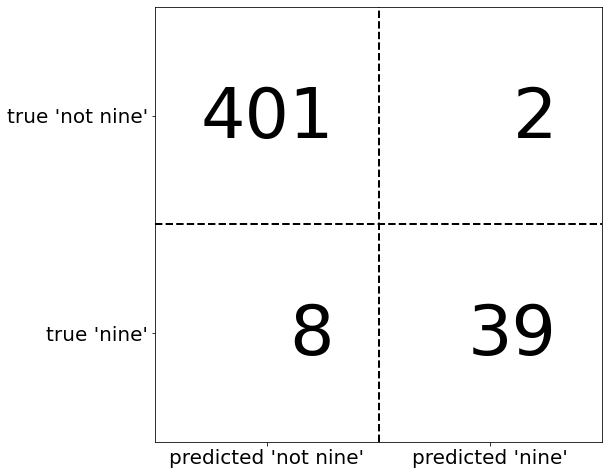

In [19]:
mglearn.plots.plot_confusion_matrix_illustration()

* 8 Falsos negativos
* 2 Falsos positivos

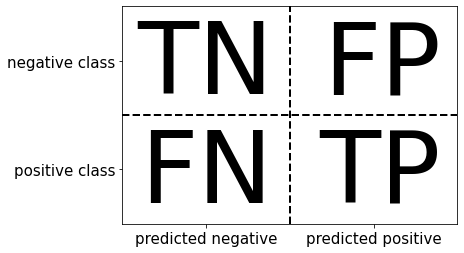

In [20]:
mglearn.plots.plot_binary_confusion_matrix()

In [21]:
# Dummy
confusion_matrix(y_test, predicion_most_frequent)

array([[403,   0],
       [ 47,   0]], dtype=int64)

In [31]:
from sklearn.metrics import recall_score
recall_score(y_test, predicion_most_frequent)

0.0

In [33]:
from sklearn.metrics import precision_score
precision_score(y_test, predicion_most_frequent)

0.0

In [23]:
# Accuracy = 
(403 + 0) / (0 + 403 + 0 + 47)

0.8955555555555555

In [24]:
# Decision Tree
confusion_matrix(y_test, pred_tree)

array([[390,  13],
       [ 24,  23]], dtype=int64)

In [25]:
# Logistic Regression
confusion_matrix(y_test, pred_logreg)

array([[402,   1],
       [  6,  41]], dtype=int64)

#### Accuracy

$$
\text{Accuracy} = \frac{TP+TN}{TP+TN+FP+FN}
$$

El accuracy es el número de predicciones correctas (TP y TN) dividido entre el número total de muestras.

#### Precision

$$
\text{Precision} = \frac{TP}{TP+FP}
$$

Se utiliza la precisión cuando el objetivo es limitar el número de falsos positivos. Comúnmente se llama al precision Positive Predictive Value (PPV).

#### Recall

$$
\text{Recall} = \frac{TP}{TP+FN}
$$

El Recall mide cuantas muestas positivas fueron capturadas por predicciones positivas. Utilizamos el recall cuando necesitamos identificar todas las muestras positivas, es decir, que queremos evitar falsos negativos. Otras formas de llamar el recall son *sensitividad* o *tasa de positivos verdaderos [true positive rate]* (TPR).

#### $F_1$-score

$$
\text{F}_1 = 2 * \frac{\text{precision}*\text{recall}}{\text{precision + recall}}
$$

El $f_1$-score es media armónica entre el precision y el recall. El $f_1$-score puede ser mejor que el accuracy para datasets no balanceados.

In [26]:
from sklearn.metrics import f1_score

In [27]:
# dummy
f1_score(y_test, predicion_most_frequent)

0.0

In [28]:
# decision tree
f1_score(y_test, pred_tree)

0.5542168674698795

In [29]:
# logistic regression
f1_score(y_test, pred_logreg)

0.9213483146067415

#### Reporte de clasificación

In [34]:
from sklearn.metrics import classification_report

In [35]:
# Dummy
print(classification_report(y_test, predicion_most_frequent, 
                      target_names = ["no nueve", "nueve"]))

              precision    recall  f1-score   support

    no nueve       0.90      1.00      0.94       403
       nueve       0.00      0.00      0.00        47

    accuracy                           0.90       450
   macro avg       0.45      0.50      0.47       450
weighted avg       0.80      0.90      0.85       450



In [36]:
# Decision tree
print(classification_report(y_test, pred_tree, 
                      target_names = ["no nueve", "nueve"]))

              precision    recall  f1-score   support

    no nueve       0.94      0.97      0.95       403
       nueve       0.64      0.49      0.55        47

    accuracy                           0.92       450
   macro avg       0.79      0.73      0.75       450
weighted avg       0.91      0.92      0.91       450



In [37]:
# Logistic regression
print(classification_report(y_test, pred_logreg, 
                      target_names = ["no nueve", "nueve"]))

              precision    recall  f1-score   support

    no nueve       0.99      1.00      0.99       403
       nueve       0.98      0.87      0.92        47

    accuracy                           0.98       450
   macro avg       0.98      0.93      0.96       450
weighted avg       0.98      0.98      0.98       450



## Tomar en cuenta la incertidumbre

### Threshold

In [38]:
from mglearn.datasets import make_blobs

X,y = make_blobs(n_samples=(400,50), centers=2, 
                 cluster_std = [7.0,2], random_state=22)

In [39]:
X_train, X_test, y_train, y_test = train_test_split(X,y,random_state=0)

In [45]:
from sklearn.svm import SVC

svc = SVC(gamma=0.5).fit(X_train,y_train)

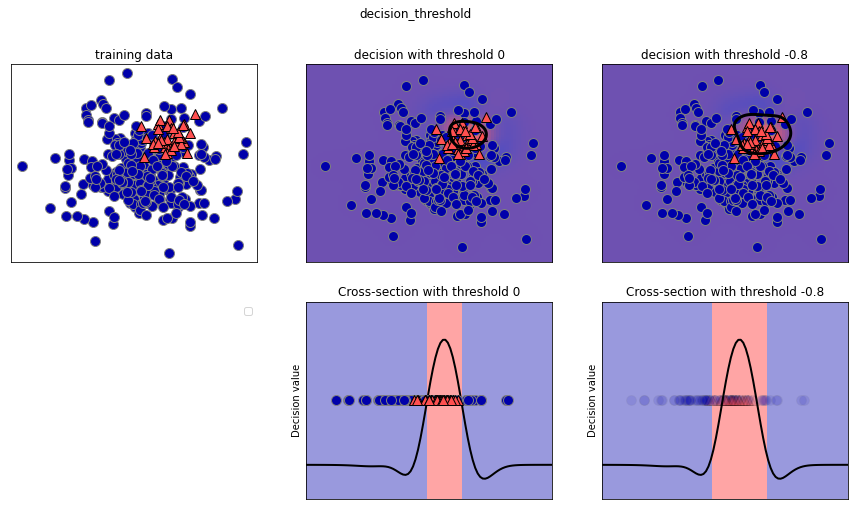

In [46]:
mglearn.plots.plot_decision_threshold()

In [42]:
print(classification_report(y_test, svc.predict(X_test)))

              precision    recall  f1-score   support

           0       0.94      0.88      0.91       104
           1       0.20      0.33      0.25         9

    accuracy                           0.84       113
   macro avg       0.57      0.61      0.58       113
weighted avg       0.88      0.84      0.86       113



Si en nuestra aplicación es más importante tener un recall grande para la clase 1, podemos arriesgarnos a a obtener más falsos positivos en cambio de más positivos verdaderos (lo cual aumentará el recall). Por defecto las predicciones en el SVC utilizan un valor de la decision_function que si es más que 0 entonces se clasifica como 1, por lo tanto si queremos más puntos clasificados como 1, debemos decrecer ese threshold

In [47]:
y_pred_lower_threshold = svc.decision_function(X_test) > -0.8

In [48]:
print(classification_report(y_test, y_pred_lower_threshold))

              precision    recall  f1-score   support

           0       1.00      0.81      0.89       104
           1       0.31      1.00      0.47         9

    accuracy                           0.82       113
   macro avg       0.66      0.90      0.68       113
weighted avg       0.95      0.82      0.86       113



### Curvas precision-recall y ROC

Cuano modificamos el threshold de un modelo de clasifiación, comúnmente decimos que estamos configurando el *punto de operación* del modelo. Asignar este punto de operación es muy útil para ayudar a las necesidades de negocios y las métricas de negocio esperadas.

Pero no es muy claro cual es el valor que debe asignarse a este punto de operación para todos los datasets y modelos. Por lo tanto es importante que probemos muchos posibles compromisos (trade-offs) entre la precisión y el recall de una vez. Para eso utilizamos algo llamado la curva de precision-recall.

In [49]:
X,y = make_blobs(n_samples=(4000,500), centers=2, 
                 cluster_std = [7.0,2], random_state=22)

X_train, X_test, y_train, y_test = train_test_split(X,y,random_state=0)

svc = SVC(gamma=0.5).fit(X_train,y_train)

In [50]:
from sklearn.metrics import precision_recall_curve

precision, recall, thresholds = precision_recall_curve(y_test, 
                                                      svc.decision_function(X_test))

In [51]:
def plot_precision_recall_svc(model, y_test, X_test):
    precision, recall, thresholds = precision_recall_curve(y_test, 
                                                      model.decision_function(X_test))
    # encontrar el threshold más cercano a 0
    close_zero = np.argmin(np.abs(thresholds))
    plt.plot(precision[close_zero], recall[close_zero], "o", 
            markersize=10, label="threshold zero", fillstyle="none",
            c="k", mew=2)
    plt.plot(precision,recall, label="precision recall curve")
    plt.xlabel("Precision")
    plt.ylabel("Recall")
    plt.legend(loc="best")
    plt.show()

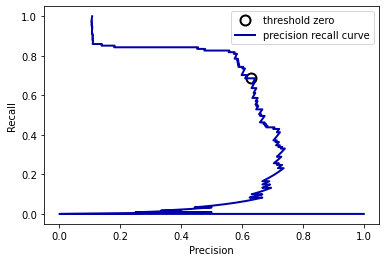

In [52]:
plot_precision_recall_svc(svc,y_test,X_test)

Mientras la curva esté más cercana a la esquina de arriba a la derecha, mejor es e clasificador. Un punto en la parte de arriba y de la derecha significa un alto recall y un alto precision para el mismo threshold.

In [53]:
# Comparación entre curvas para random forest y SVC

from sklearn.ensemble import RandomForestClassifier

rf = RandomForestClassifier(n_estimators=100, random_state=0,
                            max_features=2)
rf.fit(X_train,y_train)

RandomForestClassifier(max_features=2, random_state=0)

In [54]:
def plot_precision_recall_tree(model, y_test, X_test):
    precision, recall, thresholds = precision_recall_curve(y_test, 
                                                      model.predict_proba(X_test)[:,1])
    # encontrar el threshold más cercano a 0
    close_zero = np.argmin(np.abs(thresholds - 0.5))
    plt.plot(precision[close_zero], recall[close_zero], "^", 
            markersize=10, label="threshold zero", fillstyle="none",
            c="k", mew=2)
    plt.plot(precision,recall, label="precision recall curve")
    plt.xlabel("Precision")
    plt.ylabel("Recall")
    plt.legend(loc="best")
    plt.show()

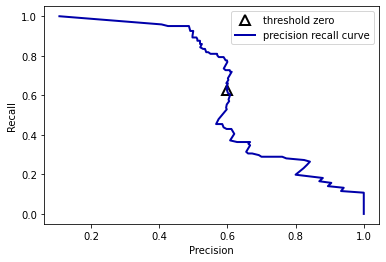

In [55]:
plot_precision_recall_tree(rf,y_test,X_test)

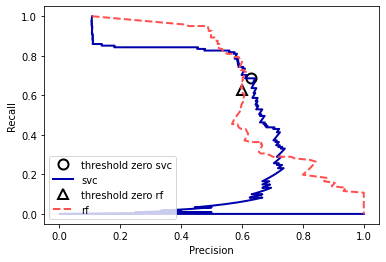

In [56]:
precision_svc, recall_svc, thresholds_svc = precision_recall_curve(y_test, 
                                                      svc.decision_function(X_test))

precision_rf, recall_rf, thresholds_rf = precision_recall_curve(y_test, 
                                                      rf.predict_proba(X_test)[:,1])

close_zero_rf = np.argmin(np.abs(thresholds_rf - 0.5))
close_zero_svc = np.argmin(np.abs(thresholds_svc))


plt.plot(precision_svc[close_zero_svc], recall_svc[close_zero_svc], "o", 
        markersize=10, label="threshold zero svc", fillstyle="none",
        c="k", mew=2)
plt.plot(precision_svc,recall_svc, label="svc")

plt.plot(precision_rf[close_zero_rf], recall_rf[close_zero_rf], "^", 
        markersize=10, label="threshold zero rf", fillstyle="none",
        c="k", mew=2)
plt.plot(precision_rf,recall_rf, "--", label="rf")
plt.xlabel("Precision")
plt.ylabel("Recall")
plt.legend(loc=3)
plt.show()

In [57]:
print("f1 del rf: ", f1_score(y_test,rf.predict(X_test)))
print("f1 del svc: ", f1_score(y_test,svc.predict(X_test)))

f1 del rf:  0.6097560975609757
f1 del svc:  0.6561264822134387


El proceso de revisión de curvas precision-recall es manual, pero hay una forma de resumir los resultadso de esta curva calculando la integral del área bajo la curva precision-recall, también llamada "precisión promedio" (average precision). 

In [58]:
from sklearn.metrics import average_precision_score

ap_rf = average_precision_score(y_test, rf.predict_proba(X_test)[:,1])
ap_svc = average_precision_score(y_test, svc.decision_function(X_test))
print("Average precision del rf: ", ap_rf)
print("Average precision del svc: ", ap_svc)

Average precision del rf:  0.659559370099291
Average precision del svc:  0.5671127001259444


Para mover el **threshold** en el resto de los clasificadores (todos menos SVC) se usa **predict_proba**.


La curva **precision-recall** trata de aumentar al mismo tiempo la precisión y el recall.

## Receiver operating characteristics (ROC) y AUC (area under the curve)

La curva ROC considera todos los thresholds posibles para un clasificacdor dado, pero a diferencia de reportar el precision y recall, nos muestra la tasa de falsos positivos (FPR) contra la tasa de verdaderos positivos (TPR). Como recordatorio el recall es el TPR, y el FPR tiene la siguiente ecuación:

$$
\text{FPR} = \frac{FP}{FP+TN}
$$


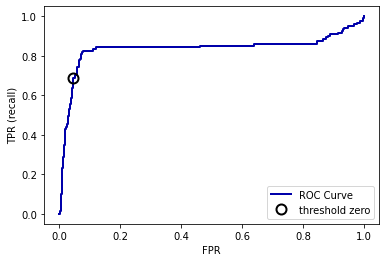

In [59]:
# ROC para el SVC

from sklearn.metrics import roc_curve

fpr, tpr, thresholds = roc_curve(y_test, svc.decision_function(X_test))

plt.plot(fpr,tpr,label="ROC Curve")
plt.xlabel("FPR")
plt.ylabel("TPR (recall)")
close_zero = np.argmin(np.abs(thresholds))
plt.plot(fpr[close_zero], tpr[close_zero], "o", markersize=10,
         label="threshold zero", fillstyle="none", c="k", mew=2)
plt.legend(loc=4)

Para la curva ROC, la curva ideal está cerca de la esquina superior izquierda: queremos un clasificador que nos de un recall alto manteniendo una tasa de falsos positivos baja.

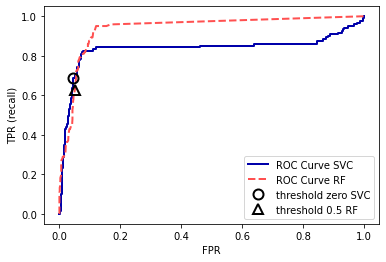

In [60]:
# ROC para el SVC y RF

from sklearn.metrics import roc_curve

fpr_svc, tpr_svc, thresholds_svc = roc_curve(y_test, svc.decision_function(X_test))
fpr_rf, tpr_rf, thresholds_rf = roc_curve(y_test, rf.predict_proba(X_test)[:,1])


plt.plot(fpr_svc,tpr_svc,label="ROC Curve SVC")
plt.plot(fpr_rf,tpr_rf,"--",label="ROC Curve RF")

close_zero_svc = np.argmin(np.abs(thresholds))
close_zero_rf = np.argmin(np.abs(thresholds_rf - 0.5))


plt.xlabel("FPR")
plt.ylabel("TPR (recall)")

plt.plot(fpr_svc[close_zero_svc], tpr_svc[close_zero_svc], "o", markersize=10,
         label="threshold zero SVC", fillstyle="none", c="k", mew=2)

plt.plot(fpr_rf[close_zero_rf], tpr_rf[close_zero_rf], "^", markersize=10,
         label="threshold 0.5 RF", fillstyle="none", c="k", mew=2)
plt.legend(loc=4)

In [61]:
from sklearn.metrics import roc_auc_score

rf_auc = roc_auc_score(y_test, rf.predict_proba(X_test)[:,1])
svc_auc = roc_auc_score(y_test, svc.decision_function(X_test))
print("AUC para el RF : {:.3f}".format(rf_auc))
print("AUC para el SVC : {:.3f}".format(svc_auc))

AUC para el RF : 0.937
AUC para el SVC : 0.836


En este caso el modelo que arrojó mejores métricas fué Random Forest.

La curva **ROC** y su respectiva area bajo la curva **AUC** trata de encontrar el modelo con menor cantidad de falsos positivos

## Métricas de regresión

### Mean absolute error (MAE)

Es la métrica más común para determinar el error de un modelo de regresión. La idea es que queremos calcular el error para cada fila de las predicciones y compararlas con los datos originales. La fórmula del MAE es:

$$
\text{MAE} = \frac{1}{N} \sum_{i=1}^{N} | y_i - \hat{y}_i|
$$

Un MAE de cero nos habla de un modelo perfecto (sospechoso), y siempre está en las unidades de la variable a predecir.

### Mean squared error (MSE)

El MSE toma el promedio cuadrado de la diferencia entre los valores originales y los valores predichos. Es también muy usada y es más sensible que el MAE, debido a que errores más grandes se "exageran" un poco más debido a los cuadrados de la ecuación. La ecuación del MSE es:

$$
\text{MSE} = \frac{1}{N} \sum_{i=1}^{N} ( y_i - \hat{y}_i )^2
$$

Comúnmente el MSE es más grande que el MAE debido a que los errores crecen de forma cuadrática con cada residual, esto hace que el MSE sea útil cuando tenemos outliers porque penaliza fuertemente los errores asociados a valores extremos. 

Las unidades del MSE son el cuadrado de la variable target, lo cual muchas veces no tiene una intepretación simple. Por lo tanto se define una métrica hija del MSE llamada RMSE, cuya ecuación es (la raíz cuadrada del MSE):


$$
\text{RMSE} = \sqrt{\frac{1}{N} \sum_{i=1}^{N} ( y_i - \hat{y}_i )^2}
$$

### El coeficiente de determinación (R$^2$ score)

El R$^2$ determina cuanto se aproximan las predicciones de la regresión a los datos reales, también se entiende como la variabilidad capturada por el modelo. La ecuación del R$^2$ es:

$$
R^2 = 1 - \frac{\sum_{i=1}^N (y_i - \hat{y}_i)^2}{\sum_{i=1}^N (y_i - \bar{y})^2}
$$

$\hat{y}_i$ representa el valor predicho de $y_i$ y $\bar{y}$ representa la media observada de los datos: $\bar{y} = \frac{1}{N}\sum_{i=1}^N y_i$

El R$^2$ va entre 0 y 1, donde 1 es el mejor valor posible y 0 el peor.

## Ejemplo

In [62]:
from sklearn.datasets import load_boston

boston = load_boston()

In [65]:
print(boston.DESCR)

.. _boston_dataset:

Boston house prices dataset
---------------------------

**Data Set Characteristics:**  

    :Number of Instances: 506 

    :Number of Attributes: 13 numeric/categorical predictive. Median Value (attribute 14) is usually the target.

    :Attribute Information (in order):
        - CRIM     per capita crime rate by town
        - ZN       proportion of residential land zoned for lots over 25,000 sq.ft.
        - INDUS    proportion of non-retail business acres per town
        - CHAS     Charles River dummy variable (= 1 if tract bounds river; 0 otherwise)
        - NOX      nitric oxides concentration (parts per 10 million)
        - RM       average number of rooms per dwelling
        - AGE      proportion of owner-occupied units built prior to 1940
        - DIS      weighted distances to five Boston employment centres
        - RAD      index of accessibility to radial highways
        - TAX      full-value property-tax rate per $10,000
        - PTRATIO  pu

In [63]:
# Definimos "X" e "y"

X = boston.data
y = boston.target

In [64]:
# Método de la exclusión

X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.3,
                                                    random_state=0)

In [66]:
# Modelado
from sklearn.linear_model import LinearRegression

lr = LinearRegression()
lr.fit(X_train,y_train)

LinearRegression()

In [67]:
y_pred = lr.predict(X_test)

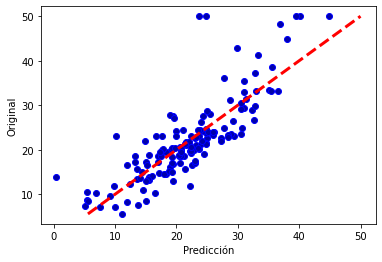

In [68]:
# Graficar la regresión

fig, ax = plt.subplots()
ax.scatter(y_pred, y_test, edgecolors=(0,0,1))
ax.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 
        "r--", lw=3)
ax.set_xlabel("Predicción")
ax.set_ylabel("Original")
plt.show()

In [69]:
## Calcular métricas de regresión

from sklearn import metrics

mae = metrics.mean_absolute_error(y_test,y_pred)
mse = metrics.mean_squared_error(y_test, y_pred)
rmse = metrics.mean_squared_error(y_test, y_pred, squared=False)
r2 = metrics.r2_score(y_test, y_pred)

print("MAE es {:.3f}".format(mae))
print("MSE es {:.3f}".format(mse))
print("RMSE es {:.3f}".format(rmse))
print("R2 es {:.3f}".format(r2))

MAE es 3.610
MSE es 27.196
RMSE es 5.215
R2 es 0.673


In [70]:
np.mean(y)

22.532806324110677

In [71]:
np.min(y)

5.0

In [72]:
np.max(y)

50.0

In [73]:
from sklearn.metrics import mean_absolute_percentage_error

In [75]:
mean_absolute_percentage_error(y_test, y_pred) * 100

18.118047288423913

Hay un error de 18%, es decir hay una diferencia promedio entre los valores predichos y reales de 3.6.